

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>





<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df1=pd.read_csv('/datasets/project_sql_result_01.csv')
print(df1.head(5))
df2=pd.read_csv('/datasets/project_sql_result_04.csv')
print(df2.head(5))
df3=pd.read_csv('/datasets/project_sql_result_07.csv')
print(df3.head(5))

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [18]:
df1.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [19]:
df2.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [20]:
df3.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [23]:
df3['start_ts']=pd.to_datetime(df3['start_ts'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [5]:
top10=df2.groupby('dropoff_location_name')['average_trips'].sum().sort_values(ascending=False).head(10).index
print(top10)

Index(['Loop', 'River North', 'Streeterville', 'West Loop', 'O'Hare',
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul'],
      dtype='object', name='dropoff_location_name')


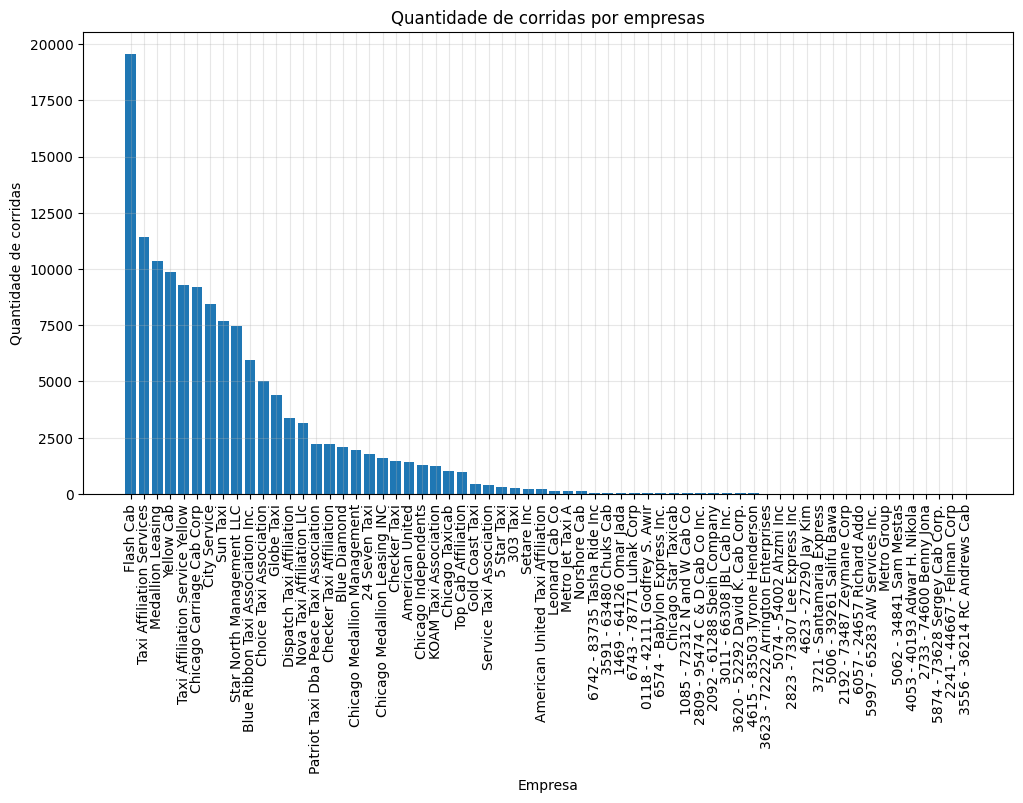

In [10]:
plt.figure(figsize=(12,6))
plt.bar(df1['company_name'], df1['trips_amount'])

plt.title("Quantidade de corridas por empresas")
plt.xlabel("Empresa")
plt.ylabel("Quantidade de corridas")
plt.xticks(rotation=90)  # gira os nomes das empresas pra não sobrepor
plt.grid(True, alpha=0.3)
plt.show()


A Flash Cab é claramente a líder de mercado, com uma quantidade de corridas muito superior às demais empresas. Isso mostra forte concentração de demanda em poucos players.
Existe um grupo intermediário de empresas (como Taxi Affiliation Services, Medallion Leasing, Yellow Cab etc.) que ainda têm relevância no mercado, mas estão bem abaixo da líder.
A partir de certo ponto no gráfico, observa-se uma long tail de empresas com volume muito baixo de corridas — possivelmente companhias pequenas, com atuação de nicho, inativas ou até já falidas.
Isso sugere um mercado concentrado e pouco competitivo, onde poucas empresas dominam quase toda a demanda.
Do ponto de vista estratégico, pode indicar barreiras de entrada elevadas para novas empresas, ou então oportunidades de fusão/aquisição para ganhar escala.

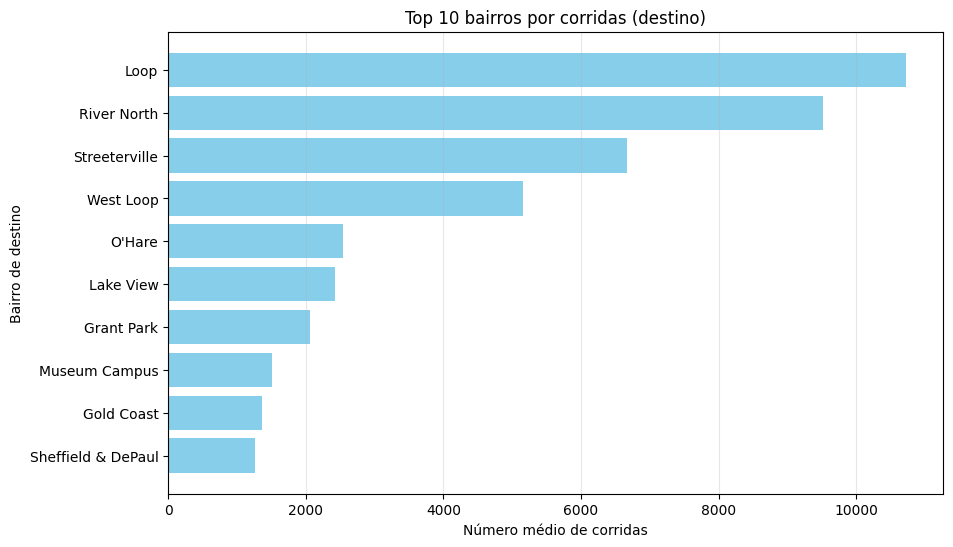

In [14]:

top_bairros = df2.sort_values(by="average_trips", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_bairros["dropoff_location_name"], top_bairros["average_trips"], color="skyblue")

plt.title("Top 10 bairros por corridas (destino)")
plt.xlabel("Número médio de corridas")
plt.ylabel("Bairro de destino")
plt.gca().invert_yaxis()  # deixa o bairro com mais corridas no topo
plt.grid(axis="x", alpha=0.3)

plt.show()

O Loop e o River North são os principais destinos de corridas, com folga em relação aos demais bairros. Isso sugere que são polos de grande concentração econômica e social, provavelmente ligados a escritórios, comércio, turismo e lazer.
Outros bairros como Streeterville e West Loop também aparecem com destaque, reforçando o padrão de alta demanda em regiões centrais e dinâmicas da cidade.
A presença de O’Hare no ranking mostra a relevância do aeroporto como ponto estratégico de chegada/partida, com forte impacto na mobilidade urbana.
Bairros como Lake View e Grant Park podem indicar atratividade turística e residencial, apontando que a demanda não se restringe apenas ao deslocamento corporativo.
O padrão observado revela que a maior parte das corridas se concentra em regiões centrais e de alta circulação, reforçando o papel dos hubs comerciais, turísticos e de transporte na geração de demanda.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Ambas as visualizações foram implementadas conforme o solicitado e permitem ver com clareza os itens que se destacam em cada uma das dimensões.
</div>


In [33]:
df3['start_ts'] = pd.to_datetime(df3['start_ts'])
df3['is_saturday'] = df3['start_ts'].dt.day_name() == "Saturday"

df3['is_rainy'] = df3['weather_conditions'].str.contains("Bad", case=False)

group_rain = df3[(df3['is_saturday']) & (df3['is_rainy'])]['duration_seconds']
group_no_rain = df3[(df3['is_saturday']) & (~df3['is_rainy'])]['duration_seconds']

t_stat, p_value = stats.ttest_ind(group_rain, group_no_rain, equal_var=False)
print("t-stat:", t_stat, "p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H0: há diferença significativa na duração média das corridas em sábados chuvosos.")
else:
    print("Não rejeitamos H0: não há evidência de diferença significativa.")

t-stat: 7.186034288068629 p-value: 6.738994326108734e-12
Rejeitamos H0: há diferença significativa na duração média das corridas em sábados chuvosos.


Hipótese nula (H₀):
A duração média das corridas do Loop para o Aeroporto O’Hare não é diferente nos sábados chuvosos em relação aos demais sábados.

Hipótese alternativa (H₁):
A duração média muda nos sábados chuvosos (ou seja, há diferença significativa).

Critério de decisão:

Se o p-valor ≤ α (0,05) → rejeitamos H₀ → há evidência de que a chuva afeta a duração média das corridas.

Se o p-valor > α (0,05) → não rejeitamos H₀ → não há evidência estatística de diferença.

Justificativa:
Usei o teste t de Welch (variação do t de Student) porque quero comparar as médias de dois grupos independentes — corridas em sábados chuvosos vs. sábados sem chuva.
A variável analisada é contínua (duration_seconds), e as amostras são grandes o suficiente pra aplicar o teste t com segurança.
Esse teste é robusto mesmo quando as variâncias entre os grupos são diferentes, o que o torna apropriado pro contexto.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

O teste foi formulado, implementado e analisado corretamente. Muito bom!
</div>

